Data will be reloaded
Loading data


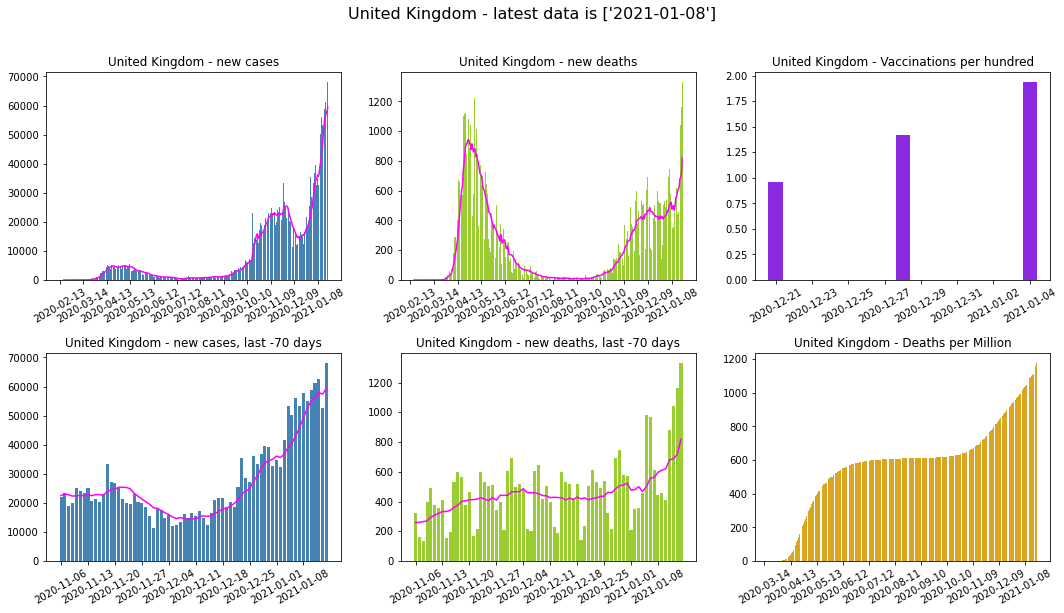

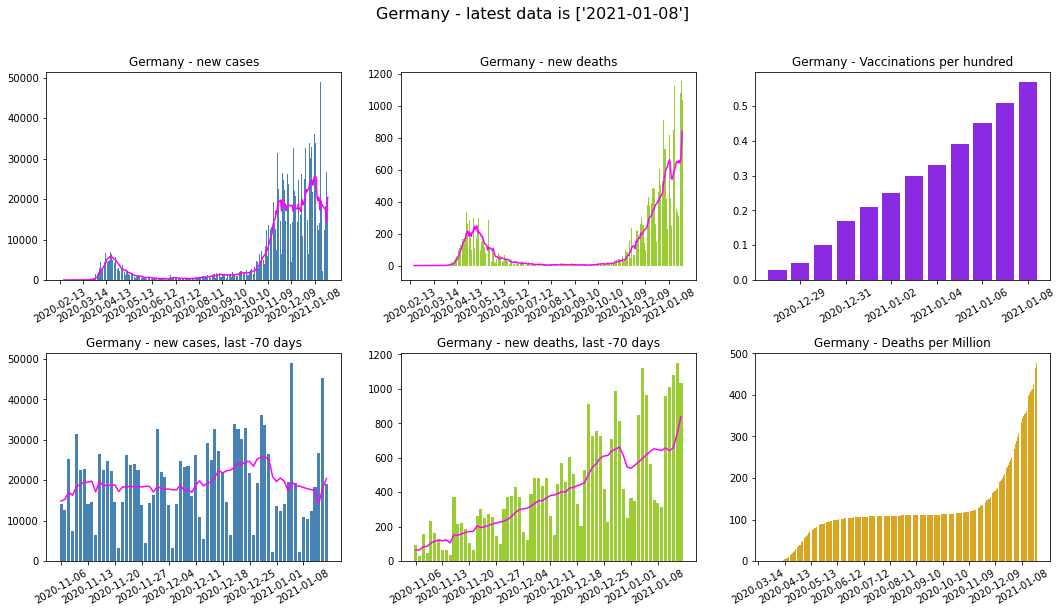

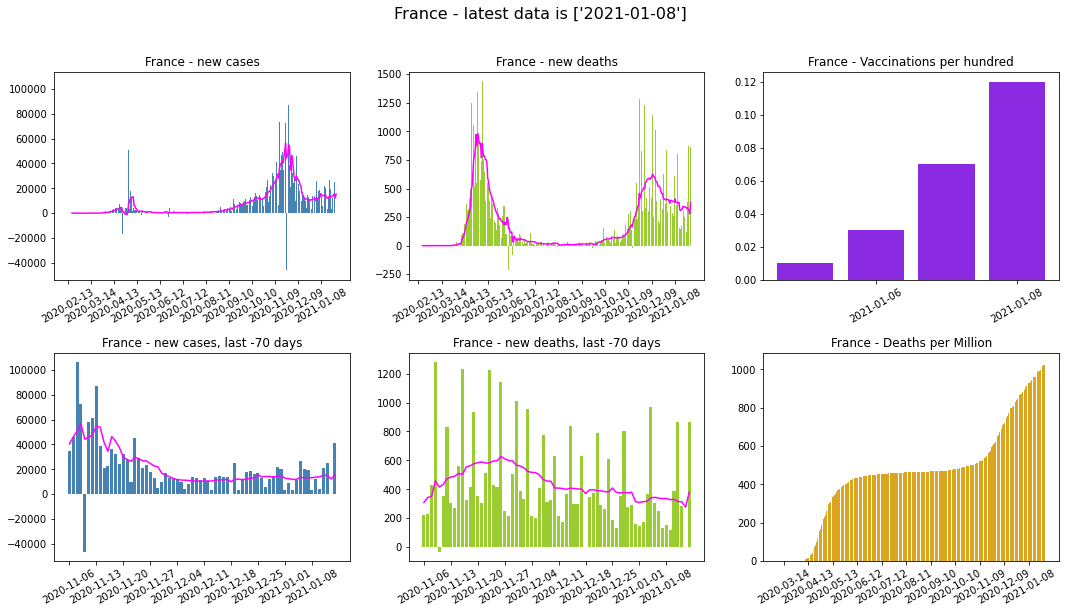

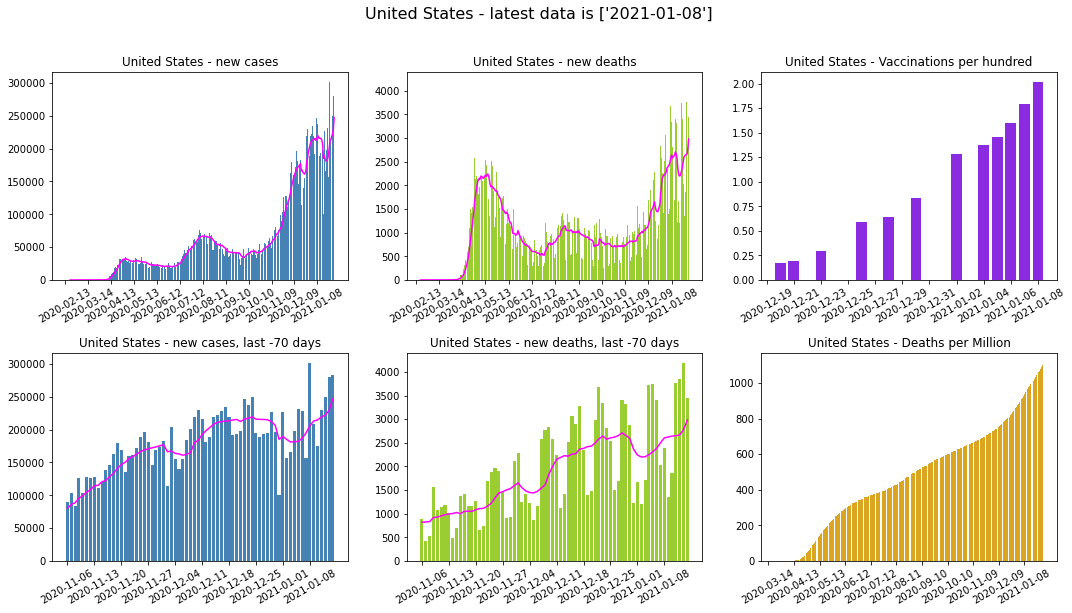

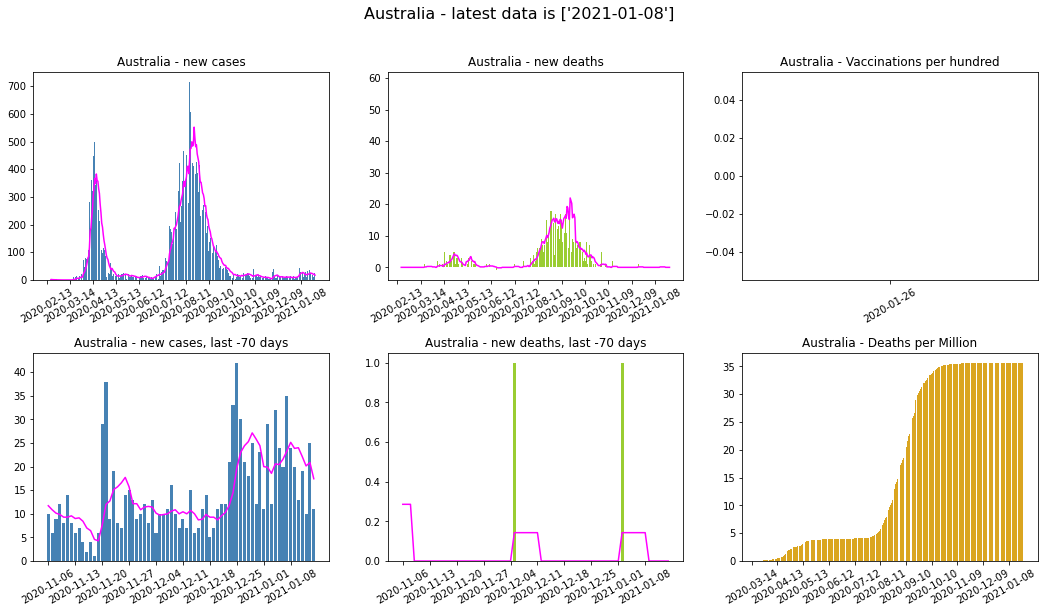

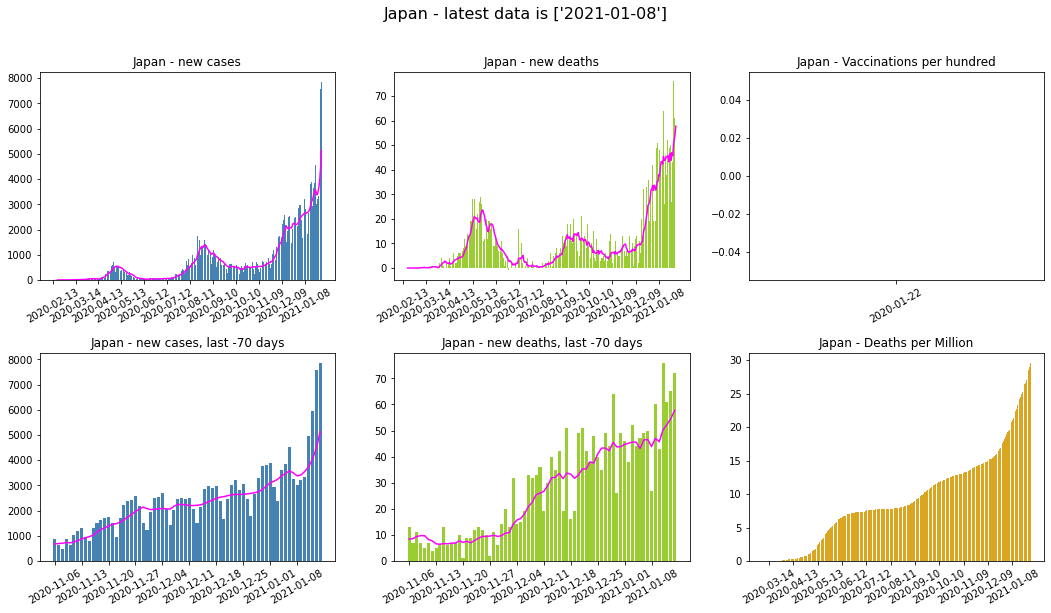

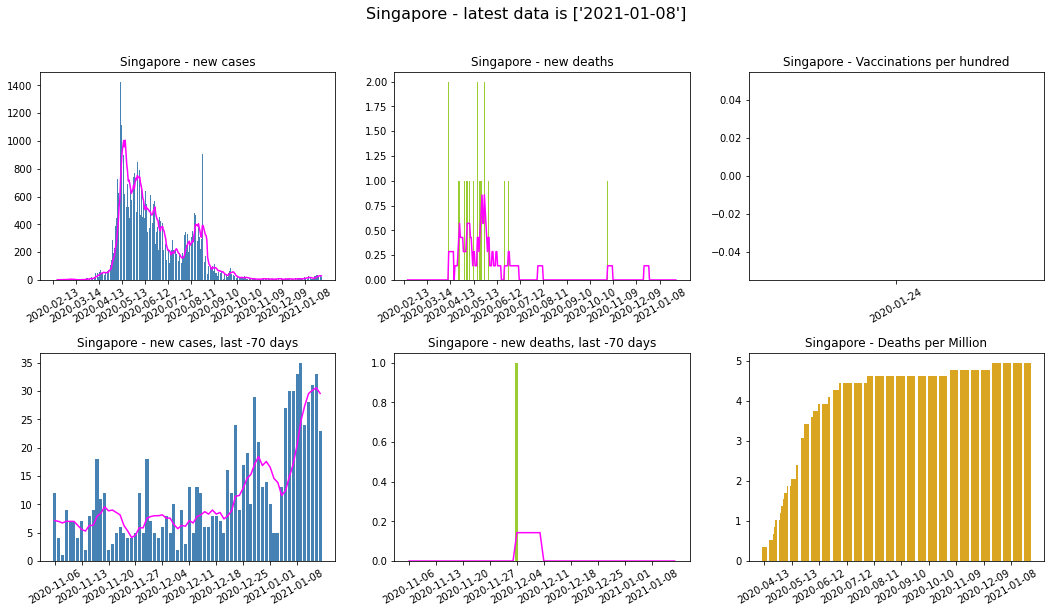

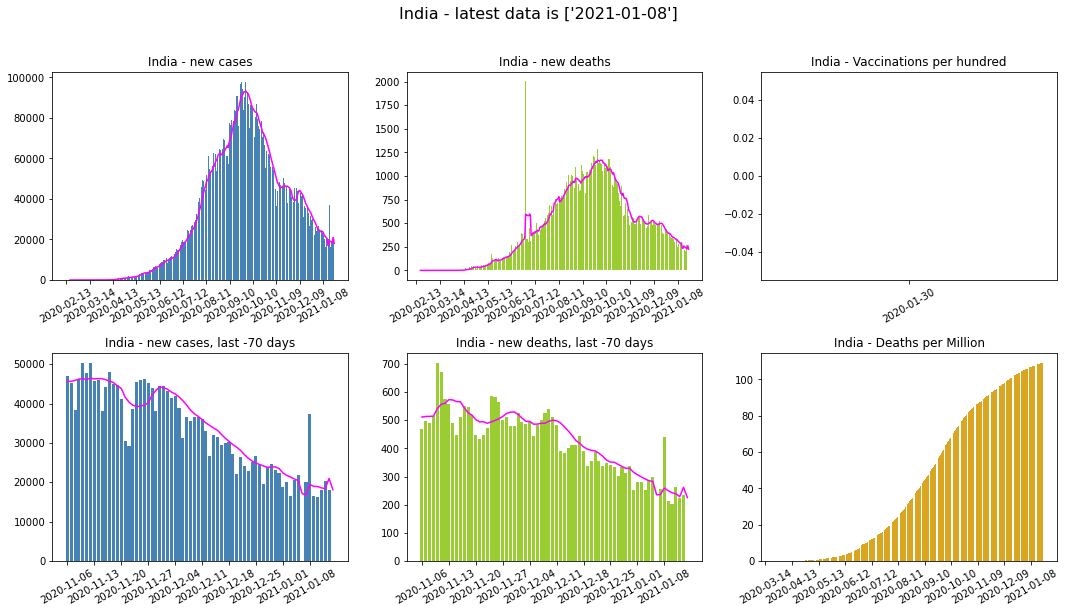

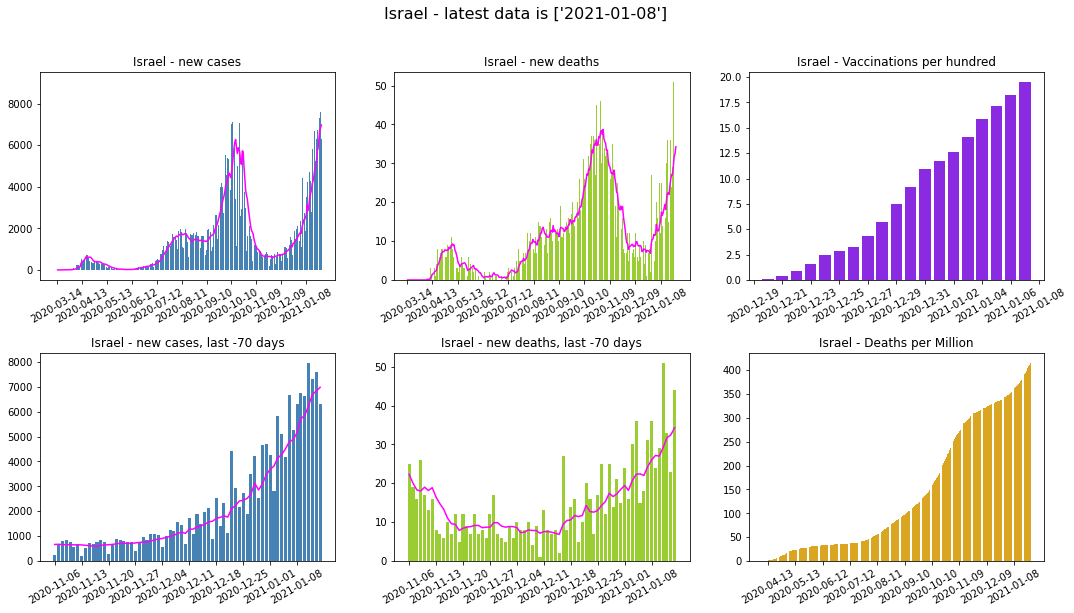

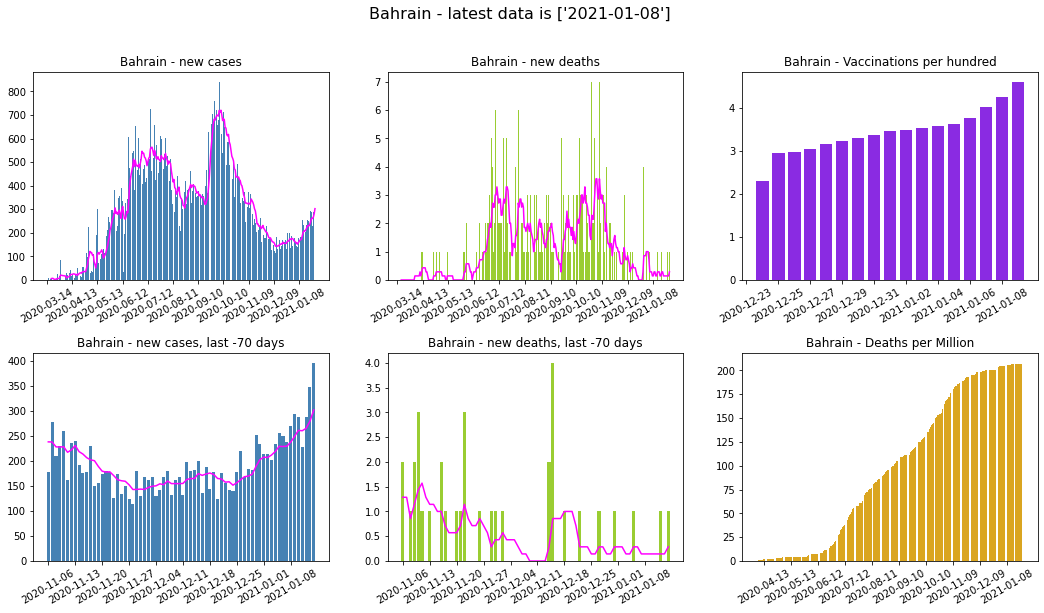

In [117]:
# Data from https://covid.ourworldindata.org/data/owid-covid-data.csv

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

ageData = dt.timedelta(hours=1, minutes=0)    # this sets up how old the data can be before we load it again.
try:
    if dataStamp + ageData < dt.datetime.today():
        load = True
        print('Data will be reloaded')
    else:
        load = False
        print(f'Data already loaded: {dataStamp.strftime("%b-%d %H:%M")}')
except:
    load = True

# Load the data
if load:
    print('Loading data')
    df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
    dataStamp = dt.datetime.today()

df.sort_values(by = 'date', inplace=True)    # Make sure it is in date order.

xrot = 30    # this just shifts the date labels so they can be read

# list the iso country codes that we want to report on
for country in ['GBR', 'DEU', 'FRA', 'USA', 'AUS', 'JPN', 'SGP', 'IND', 'ISR', 'BHR']:
    df1 = df[df.iso_code == country]    # subset the data
    for name in df[df.iso_code == country]['location'][0:1]:
        pass     # just pass the name back
    x = []    # setup an empty array for the X values
    for date in df1.date.tolist():    # pop each date into the x-axis
        x.append(date)
    
    plt.rcParams["figure.figsize"] = (18,9)    # Create the Plot size
    fig , ax = plt.subplots(2,3)    # Create the plot space
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35) # add horizontal spacing
    fig.suptitle(f"{name} - latest data is {x[-1:]}", fontsize=16)    # title the figure
    
    ticks = []    # empty array of tick positions
    i, step = 0, 30    # we use i as the tick position and step as how many to skip so we space the labels out
    for tick in x[::step]:    # loop through and slice each step
        ticks.append(i)    # add the position number to the array
        i += step    # increment the tick position
    y1 = df1.new_cases    # set the y axis values
    y2 = df1.new_cases_smoothed
    y3 = df1.new_deaths
    y4 = df1.new_deaths_smoothed
    y5 = df1.total_vaccinations_per_hundred
    y6 = df1.total_deaths_per_million
    
    plt.subplot(231)    # top left
    plt.title(f"{name} - new cases")
#    plt.xticks(ticks, x[::step], rotation=xrot)
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot)
    plt.bar(x, y1, color='steelblue')
    plt.plot(x, y2, color='magenta')

    plt.subplot(232)    # top centre
    plt.title(f"{name} - new deaths")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot)
    plt.bar(x, y3, color='yellowgreen')
    plt.plot(x, y4, color='magenta')

    plt.subplot(236)    # bottom right
    plt.title(f"{name} - Deaths per Million")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot)
    plt.bar(x, y6, color='goldenrod')

    ### This is for the vaccinations, as we have less data we need more frequent data labels. 
    ticks = []    # empty array of tick positions
    i, step = 0, 2    # we use i as the tick position and step as how many to skip so we space the labels out
    for tick in x[::step]:    # loop through and slice each step
        ticks.append(i)    # add the position number to the array
        i += step    # increment the tick position

    plt.subplot(233)    # top right
    plt.title(f"{name} - Vaccinations per hundred")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot)
    plt.xticks(rotation=xrot)
    plt.bar(x, y5, color='blueviolet')

    ### This section just slices the same date but only the last 35 values
    recent = -70    # this sets the look back value
    i, step = 0, 7
    ticks = []
    for tick in x[recent::step]:
        ticks.append(i)
        i += step

    plt.subplot(234)    # bottom left
    plt.title(f"{name} - new cases, last {recent} days")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot)
    plt.bar(x[recent:], y1[recent:], color='steelblue')
    plt.plot(x[recent:], y2[recent:], color='magenta')

    plt.subplot(235)    # bottom centre
    plt.title(f"{name} - new deaths, last {recent} days")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot)
    plt.bar(x[recent:], y3[recent:], color='yellowgreen')
    plt.plot(x[recent:], y4[recent:], color='magenta')


MEX


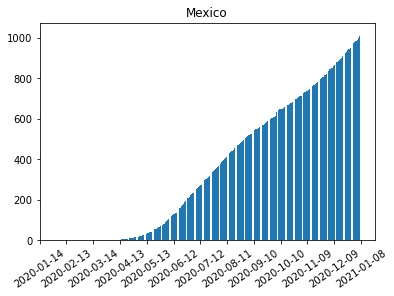

In [118]:
i = 0
for country in df.iso_code.unique():
    print(country)
    if pd.isna(country):
        pass
    else:
        df1 = df.loc[df.iso_code == country]
        plt.rcParams["figure.figsize"] = (6,4)
        plt.bar(df1.date, df1.total_deaths_per_million)
        plt.xticks(df1.date[-(df1.date.size//30) * 30 -1 ::30] ,  rotation=35)
        plt.title(df1.location.unique()[0])
        plt.show()
        i += 1
    if i == 1: break

In [119]:
for code in df.iso_code.unique():
    if not pd.isna(code):
        print(code)

MEX
ARG
THA
TWN
KOR
JPN
OWID_WRL
USA
CHN
VNM
SGP
FRA
CHE
MYS
NPL
CAN
AUS
ISR
KHM
LKA
DEU
DNK
ARE
FIN
IND
PHL
FJI
RUS
ITA
HKG
GBR
SWE
ESP
GRC
PRT
LVA
CZE
BEL
MLT
MAR
ZAF
EGY
NLD
GTM
IRN
LBN
CHL
LTU
IRQ
BHR
AFG
LUX
OMN
NOR
KWT
AUT
HRV
DZA
PAK
MKD
BRA
EST
GEO
SRB
ROU
SMR
ISL
NGA
BLR
SEN
NZL
IRL
MCO
QAT
DOM
AZE
ECU
ARM
SAU
AND
IDN
JOR
BGD
UKR
POL
HUN
LBY
TGO
TUN
LIE
PSE
SVN
BIH
COL
CRI
CMR
VAT
BTN
PER
KEN
SVK
PRY
MDV
MDA
BGR
CYP
PAN
BRN
ALB
BFA
MNG
COD
HND
CIV
TUR
BOL
JAM
CUB
GUY
ETH
URY
ATG
GIN
KAZ
SDN
OWID_KOS
NAM
GAB
VEN
TTO
GHA
SWZ
VCT
SUR
SYC
MRT
LCA
RWA
GNQ
CAF
UZB
COG
BHS
TZA
SOM
LBR
BEN
BRB
GMB
MNE
MUS
DJI
ZMB
KGZ
SLV
NIC
TCD
NER
CPV
MDG
HTI
ZWE
AGO
PNG
ERI
UGA
DMA
SYR
GRD
MOZ
TLS
BLZ
LAO
GNB
MLI
KNA
MMR
MWI
BWA
SLE
BDI
SSD
STP
YEM
COM
TJK
LSO
SLB
MHL
VUT
WSM


In [120]:
df = df.loc[df.iso_code != 'OWID_WRL']
for item in ['total_vaccinations_per_hundred', 'total_deaths_per_million', 'total_cases_per_million',
            'icu_patients_per_million', 'total_tests_per_thousand', 'new_deaths_per_million']:
    print('####')
    print(df.loc[df[item].idxmax()][['location',item]])

####
location                          Israel
total_vaccinations_per_hundred     19.55
Name: 26081, dtype: object
####
location                    San Marino
total_deaths_per_million       1885.79
Name: 45221, dtype: object
####
location                   Andorra
total_cases_per_million     109869
Name: 1257, dtype: object
####
location                    Belgium
icu_patients_per_million    127.183
Name: 5349, dtype: object
####
location                    Luxembourg
total_tests_per_thousand        2758.8
Name: 31656, dtype: object
####
location                  Ecuador
new_deaths_per_million    218.329
Name: 15770, dtype: object


In [121]:
df.loc[df.iso_code == 'GBR'][['date','new_deaths']].sort_values(by=['new_deaths'], ascending=False)[:5]

,date,new_deaths
55741,2021-01-08,1333.0
55479,2020-04-21,1224.0
55740,2021-01-07,1162.0
55468,2020-04-10,1123.0
55467,2020-04-09,1117.0


In [122]:
df.loc[df.iso_code == 'GBR'][['date','new_cases']].sort_values(by=['new_cases'], ascending=False)[:5]

,date,new_cases
55741,2021-01-08,68192.0
55739,2021-01-06,62556.0
55738,2021-01-05,61087.0
55737,2021-01-04,58923.0
55735,2021-01-02,57853.0


In [125]:
i = df.loc[df.iso_code == 'GBR'].last_valid_index()
df.loc[i]

iso_code                                         GBR
continent                                     Europe
location                              United Kingdom
date                                      2021-01-08
total_cases                              2.96624e+06
new_cases                                      68192
new_cases_smoothed                           59507.9
total_deaths                                   79965
new_deaths                                      1333
new_deaths_smoothed                          818.286
total_cases_per_million                      43694.5
new_cases_per_million                        1004.51
new_cases_smoothed_per_million               876.585
total_deaths_per_million                     1177.93
new_deaths_per_million                        19.636
new_deaths_smoothed_per_million               12.054
reproduction_rate                                NaN
icu_patients                                     NaN
icu_patients_per_million                      

In [124]:
df.loc[i]

iso_code                                         GBR
continent                                     Europe
location                              United Kingdom
date                                      2021-01-08
total_cases                              2.96624e+06
new_cases                                      68192
new_cases_smoothed                           59507.9
total_deaths                                   79965
new_deaths                                      1333
new_deaths_smoothed                          818.286
total_cases_per_million                      43694.5
new_cases_per_million                        1004.51
new_cases_smoothed_per_million               876.585
total_deaths_per_million                     1177.93
new_deaths_per_million                        19.636
new_deaths_smoothed_per_million               12.054
reproduction_rate                                NaN
icu_patients                                     NaN
icu_patients_per_million                      